In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import scipy.stats as sps
from statsmodels.stats.proportion import proportions_ztest
# import pingouin as pg

### **Описание данных:**
* rank:  Рейтинг миллиардера с точки зрения богатства.
* finalWorth:  Итоговый чистый капитал миллиардера в долларах США.
* category:  Категория или отрасль, в которой работает бизнес миллиардера.
* personName:  Полное имя миллиардера.
* age:  Возраст миллиардера.
* country:  Страна, в которой проживает миллиардер.
* city:  Город, в котором проживает миллиардер.
* source:  Источник богатства миллиардера.
* industries:  Отрасли, связанные с деловыми интересами миллиардера.
* countryOfCitizenship:  Страна гражданства миллиардера.
* organization:  Название организации или компании, связанной с миллиардером.
* selfMade:  Указывает, сделал ли миллиардер себя сам (Правда/Ложь).
* status:  "D" означает миллиардеров, сделавших себя сами (основателей/предпринимателей), а "U" указывает на унаследованное или незаработанное богатство.
* gender:  Пол миллиардера.
* birthDate:  Дата рождения миллиардера.
* lastName:  Фамилия миллиардера.
* firstName:  Первое имя миллиардера.
* title:  Титул или почетное звание миллиардера.
* date:  Дата сбора данных.
* state:  Штат, в котором проживает миллиардер.
* residenceStateRegion:  Регион или штат проживания миллиардера.
* birthYear:  Год рождения миллиардера.
* birthMonth:  Месяц рождения миллиардера.
* birthDay:  День рождения миллиардера.
* cpi_country:  Индекс потребительских цен (ИПЦ) для страны миллиардера.
* cpi_change_country:  Изменение индекса потребительских цен для страны миллиардера.
* gdp_country:  Валовой внутренний продукт (ВВП) страны миллиардера.
* gross_tertiary_education_enrollment:  Зачисление в высшие учебные заведения в стране миллиардера.
* gross_primary_education_enrollment_country:  Зачисление в начальные учебные заведения в стране миллиардера.
* life_expectancy_country:  Ожидаемая продолжительность жизни в стране миллиардера.
* tax_revenue_country_country:  Налоговые поступления в стране миллиардера.
* total_tax_rate_country:  Общая налоговая ставка в стране миллиардера.
* population_country:  Население страны миллиардера.
* latitude_country:  Координата широты страны миллиардера.
* longitude_country:  Координата долготы страны миллиардера.

In [2]:
billionaires = pd.read_csv('/content/drive/MyDrive/Billionaires Statistics Dataset.zip')
billionaires.shape

(2640, 35)

In [3]:
billionaires.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


Количество заполненных ячеек в каждом столбце и его тип данных

In [4]:
billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

Количество пропущенных значений в каждом столбце

In [5]:
billionaires.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [6]:
billionaires.query('category != industries')[['personName', 'category', 'industries']]
# Колонки category и industries совпадают, одну из них можно удалить

,personName,category,industries


Удалим ненужные колонки

In [7]:
billionaires = billionaires.drop(columns=['rank',
                                          'firstName',
                                          'lastName',
                                          'title',
                                          'industries',
                                          'date',
                                          'birthYear',
                                          'birthDay',
                                          'latitude_country',
                                          'longitude_country'])

Преобразуем некоторые колонки

In [8]:
billionaires['finalWorth'] = billionaires['finalWorth'] / 1000
billionaires['gdp_country'] = billionaires['gdp_country'].str.replace('$', '',regex = True).str.replace(',', '',regex = True).astype(float)

### EDA

####Откуда больше всего миллиардеров? Посмотрим на карту мира

In [9]:
# Предобработаем данные

count_billies_by_country = billionaires.countryOfCitizenship.value_counts().reset_index()
count_billies_by_country = count_billies_by_country.rename(columns={'index': 'country', 'countryOfCitizenship': 'count_billies'})
count_billies_by_country.head()

,country,count_billies
0,United States,735
1,China,491
2,India,169
3,Germany,126
4,Russia,104


In [56]:
# fig = px.scatter_geo(count_billies_by_country,
#                      locations='country',
#                      locationmode='country names',
#                      hover_name='country',
#                      color='country',
#                      size='count_billies',
#                      title="Распределение миллиардеров на карте мира")

fig = px.choropleth(count_billies_by_country,
                    locations='country',
                    locationmode='country names',
                    hover_name='country',
                    color='count_billies',
                    color_continuous_scale='brwnyl',
                    title="Распределение миллиардеров на карте мира")


fig.update_layout(width=1000, height=600)
fig.show()

Больше всех миллиардеров наблюдается в Америке, поэтому можно посмотреть на концентрацию миллиардеров в каждом штате.

In [57]:
# Предобработаем данные
count_billies_by_state = billionaires.state.value_counts().reset_index()
count_billies_by_state = count_billies_by_state.rename(columns={'state': 'count_billies', 'index': 'state'})
count_billies_by_state.head()

,state,count_billies
0,California,178
1,New York,128
2,Florida,94
3,Texas,70
4,Illinois,24


In [58]:
# Добавим аббревиатуры для каждого штата
states_shorts = {"Alabama": "AL", "Alaska": "AK",
                "Arizona": "AZ", "Arkansas": "AR",
                "California": "CA", "Colorado": "CO",
                "Connecticut": "CT", "Delaware": "DE",
                "Florida": "FL", "Georgia": "GA",
                "Hawaii": "HI", "Idaho": "ID",
                "Illinois": "IL", "Indiana": "IN",
                "Iowa": "IA", "Kansas": "KS",
                "Kentucky": "KY", "Louisiana": "LA",
                "Maine": "ME", "Maryland": "MD",
                "Massachusetts": "MA", "Michigan": "MI",
                "Minnesota": "MN", "Mississippi": "MS",
                "Missouri": "MO", "Montana": "MT",
                "Nebraska": "NE", "Nevada": "NV",
                "New Hampshire": "NH", "New Jersey": "NJ",
                "New Mexico": "NM", "New York": "NY",
                "North Carolina": "NC", "North Dakota": "ND",
                "Ohio": "OH", "Oklahoma": "OK",
                "Oregon": "OR", "Pennsylvania": "PA",
                "Rhode Island": "RI", "South Carolina": "SC",
                "South Dakota": "SD", "Tennessee": "TN",
                "Texas": "TX", "Utah": "UT",
                "Vermont": "VT", "Virginia": "VA",
                "Washington": "WA", "West Virginia": "WV",
                "Wisconsin": "WI", "Wyoming": "WY",
                 "U.S. Virgin Islands": "VI"}

count_billies_by_state['state_short'] = [states_shorts[x] for x in count_billies_by_state['state']]

In [59]:
count_billies_by_state.head()

,state,count_billies,state_short
0,California,178,CA
1,New York,128,NY
2,Florida,94,FL
3,Texas,70,TX
4,Illinois,24,IL


In [60]:
fig = px.choropleth(count_billies_by_state,
                    locations='state_short',
                    locationmode='USA-states',
                    hover_name='state',
                    color='count_billies',
                    color_continuous_scale='brwnyl',
                    title="Распределение миллиардеров на карте мира",
                    scope="usa")


fig.update_layout(width=1000, height=600)
fig.show()

Для миллиардеров самыми благоприятными штатами оказались Калифорния, Нью-Йорк и Флорида

####Теперь посмотрим на возраст миллиардеров

Распределение возраста для миллиардеров

In [61]:
# Посмотрим на основные метрики возраста миллиардеров
billionaires.age.describe()

count    2575.000000
mean       65.140194
std        13.258098
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: age, dtype: float64

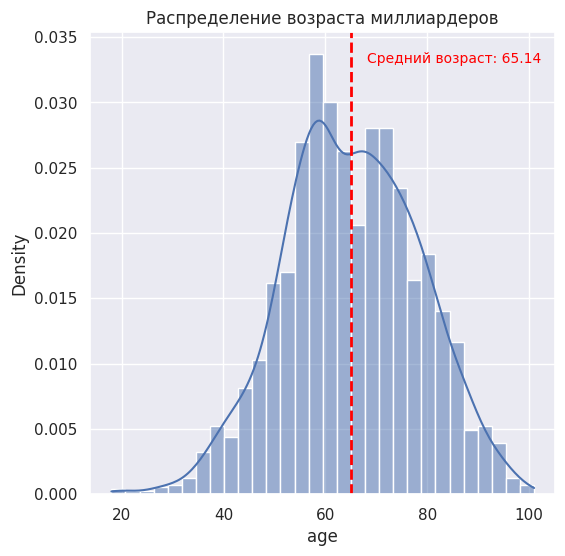

In [62]:
sns.set(rc={'figure.figsize': (6,6)})
# Нарисуем само распределение
sns.histplot(billionaires, x='age', stat='density', kde=True)

# Добавим среднее на график
average_age = billionaires['age'].mean()
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2);
plt.text(average_age + 3, 0.033, f'Средний возраст: {round(average_age, 2)}', color='red', fontsize=10)
plt.title('Распределение возраста миллиардеров');

Рассмотрим есть ли различия у распределений в возрасте по полу. (Посмотрим в частоте)

In [17]:
male_billies = billionaires.query('gender == "M"')
female_billies = billionaires.query('gender == "F"')

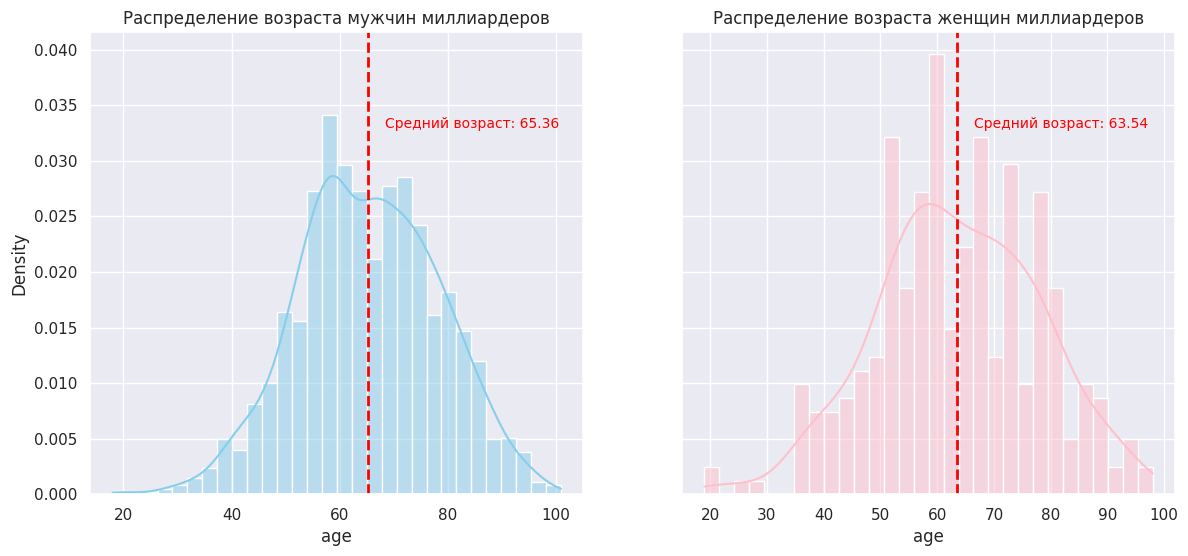

In [18]:
sns.set(rc={'figure.figsize': (14,6)})
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Нарисуем распределение для мужчин
sns.histplot(male_billies, x='age', stat="density", color='skyblue', bins=30, kde=True, ax=ax1)
# Добавим среднее на график
average_male_age = male_billies['age'].mean()
ax1.axvline(average_male_age, color='red', linestyle='dashed', linewidth=2);
ax1.text(average_male_age + 3, 0.033, f'Средний возраст: {round(average_male_age, 2)}', color='red', fontsize=10)
ax1.set_title('Распределение возраста мужчин миллиардеров')

# Нарисуем распределение для женщин
sns.histplot(female_billies, x='age', stat="density", color='pink', bins=30, kde=True, ax=ax2)
# Добавим среднее на график
average_female_age = female_billies['age'].mean()
ax2.axvline(average_female_age, color='red', linestyle='dashed', linewidth=2);
ax2.text(average_female_age + 3, 0.033, f'Средний возраст: {round(average_female_age, 2)}', color='red', fontsize=10)
ax2.set_title('Распределение возраста женщин миллиардеров');

Как видно формы распределений достаточно похожи. Проверим так ли это, при помощи стат. тестов.

$H_0: F_m = F_f$

$H_1: F_m \ne F_f$

$F$ — функция распределения возраста у мужчин и женщин миллиардеров, $m$ и $f$ — выборки мужчин и женщин соответственно.

Возьмем уровень значимости 0.05

In [19]:
male_age = male_billies.age
female_age = female_billies.age

Критерий Манна-Уитни

In [20]:
sps.mannwhitneyu(male_age, female_age, nan_policy='omit')

MannwhitneyuResult(statistic=372418.0, pvalue=0.04698138261499063)

Критерий Когмогорова-Смирнова

In [21]:
sps.ks_2samp(male_age, female_age)

KstestResult(statistic=0.0785300040844673, pvalue=0.05015651795534186, statistic_location=88.0, statistic_sign=1)

Дополнительно проведем z-test пропорций, предварительно разбив распределение на квантили

In [22]:
df_bins = pd.DataFrame()

In [23]:
# Generate bins from control group
_, bins = pd.qcut(male_age, q=10, retbins=True)
df_bins['bin'] = pd.cut(male_age, bins=bins).value_counts().index

In [24]:
df_bins['male_age_observed'] = pd.cut(male_age, bins=bins).value_counts().values
df_bins['female_age_observed'] = pd.cut(female_age, bins=bins).value_counts().values

In [25]:
males_nobs = len(male_age)
females_nobs = len(female_age)

# Проверим, что никого не потеряли
(males_nobs + females_nobs) == billionaires.shape[0]

True

In [26]:
def calc_pval(male_count, female_count, male_nobs, female_nobs, alpha=.05):
    count = np.array([male_count, female_count])
    nobs = np.array([male_nobs, female_nobs])
    stat, pval = proportions_ztest(count, nobs, alpha)
    return pval

In [27]:
df_bins['p_value'] = df_bins.apply(lambda x: calc_pval(x['male_age_observed'],
                                                       x['female_age_observed'],
                                                       males_nobs,
                                                       females_nobs),
                                   axis=1)

In [28]:
df_bins

,bin,male_age_observed,female_age_observed,p_value
0,"(54.0, 58.0]",260,46,0.000081
1,"(65.0, 69.0]",248,34,0.016473
2,"(69.0, 73.0]",238,34,0.007325
3,"(18.0, 49.0]",236,33,0.009997
4,"(49.0, 54.0]",223,32,0.005217
5,"(82.0, 101.0]",222,27,0.047893
6,"(61.0, 65.0]",219,27,0.038835
7,"(58.0, 61.0]",210,27,0.019530
8,"(77.0, 82.0]",208,25,0.040655
9,"(73.0, 77.0]",203,22,0.095649


Полученный уровень значимости почти везде меньше 0.05, следовательно мы получили статистически значимые различия в возрасте между полами миллиардеров.

Посмотрим сколько есть миллиардеров до 30, сделавших себя сами (На момент 4 апреля 2023)

In [29]:
billionaires.query('age < 30 & selfMade == True')[[ 'personName', 'finalWorth', 'category', 'age', 'country', 'source', 'selfMade', 'status']]

,personName,finalWorth,category,age,country,source,selfMade,status
2414,Ryan Breslow,1.1,Technology,28.0,United States,E-commerce software,True,D


В каком месяце чаще всего были рождены миллиардеры?

In [30]:
# Предобработаем данные, чтобы не изменить основной фрэйм
months = {1: "January",
          2: "February",
          3: "March",
          4: "April",
          5: "May",
          6: "June",
          7: "July",
          8: "August",
          9: "September",
          10: "October",
          11: "November",
          12: "December"}


birthMonths = billionaires['birthMonth'].dropna().astype(int)
birthMonths = [months[i] for i in birthMonths]

Как видно, в Январе родилось в несколько раз больше миллиардеров, чем в любой из остальных месяцев.

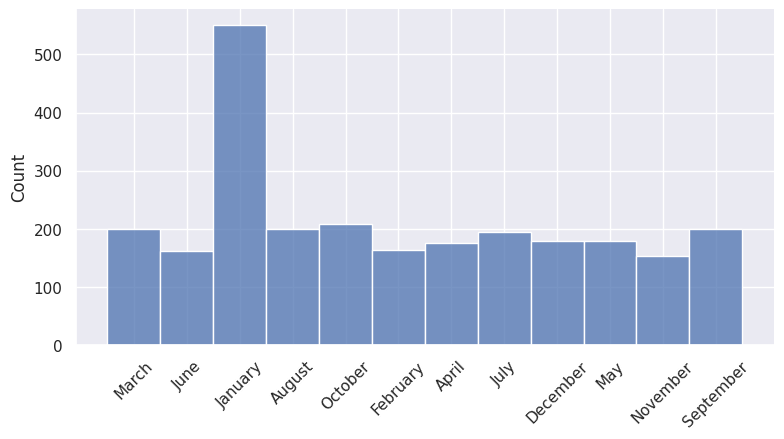

In [31]:
sns.displot(birthMonths, height=4, aspect=2).set_xticklabels(rotation=45);

####Отрасли биснеса

Посмотрим сколько людей в чем преуспели.

In [43]:
business_category = billionaires['category'].value_counts()
business_category.head()

Finance & Investments    372
Manufacturing            324
Technology               314
Fashion & Retail         266
Food & Beverage          212
Name: category, dtype: int64

Визуализируем полученные данные

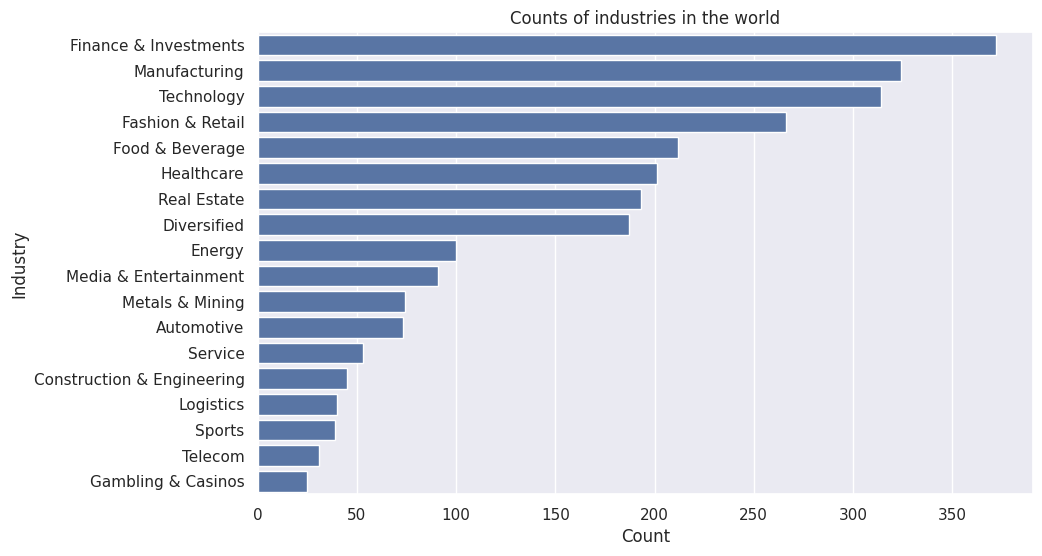

In [44]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=business_category.values,
                 y=business_category.index,
                 order=business_category.index)

plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('Counts of industries in the world')

plt.show()

Топ-3 направлений, где преуспело большинство миллиардеров: финансы и инвестиции, производство, технологии

Найдем топ-10 самых состоятельных миллиардеров мира

In [35]:
billionaires[['finalWorth',
              'category',
              'personName',
              'age',
              'country',
              'organization',
              'gender']]\
              .sort_values(by='finalWorth', ascending=False).head(10)

,finalWorth,category,personName,age,country,organization,gender
0,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,LVMH Moët Hennessy Louis Vuitton,M
1,180.0,Automotive,Elon Musk,51.0,United States,Tesla,M
2,114.0,Technology,Jeff Bezos,59.0,United States,Amazon,M
3,107.0,Technology,Larry Ellison,78.0,United States,Oracle,M
4,106.0,Finance & Investments,Warren Buffett,92.0,United States,Berkshire Hathaway Inc. (Cl A),M
5,104.0,Technology,Bill Gates,67.0,United States,Bill & Melinda Gates Foundation,M
6,94.5,Media & Entertainment,Michael Bloomberg,81.0,United States,Bloomberg,M
7,93.0,Telecom,Carlos Slim Helu & family,83.0,Mexico,América Móvil,M
8,83.4,Diversified,Mukesh Ambani,65.0,India,Reliance Industries,M
9,80.7,Technology,Steve Ballmer,67.0,United States,Los Angeles Clippers,M


Рассмотрим миллиардеров из России. Где преуспели они?

In [42]:
russians = billionaires.query('country == "Russia"')
russians.head(3)

,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,organization,selfMade,...,birthMonth,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
61,23.7,Metals & Mining,Vladimir Potanin,62.0,Russia,Moscow,Metals,Russia,NaN,True,...,1.0,180.75,4.5,1.699877e+12,81.9,102.6,72.7,11.4,46.2,144373535.0
69,22.1,Metals & Mining,Vladimir Lisin,66.0,Russia,Moscow,"Steel, transport",Russia,NaN,True,...,5.0,180.75,4.5,1.699877e+12,81.9,102.6,72.7,11.4,46.2,144373535.0
72,21.6,Energy,Leonid Mikhelson & family,67.0,Russia,Moscow,"Gas, chemicals",Russia,NaN,True,...,8.0,180.75,4.5,1.699877e+12,81.9,102.6,72.7,11.4,46.2,144373535.0


In [54]:
rus_business_category = russians['category'].value_counts()
rus_business_category = rus_business_category[rus_business_category.values > 0]
rus_business_category.head()

Energy                   15
Metals & Mining          15
Finance & Investments     8
Diversified               8
Manufacturing             7
Name: category, dtype: int64

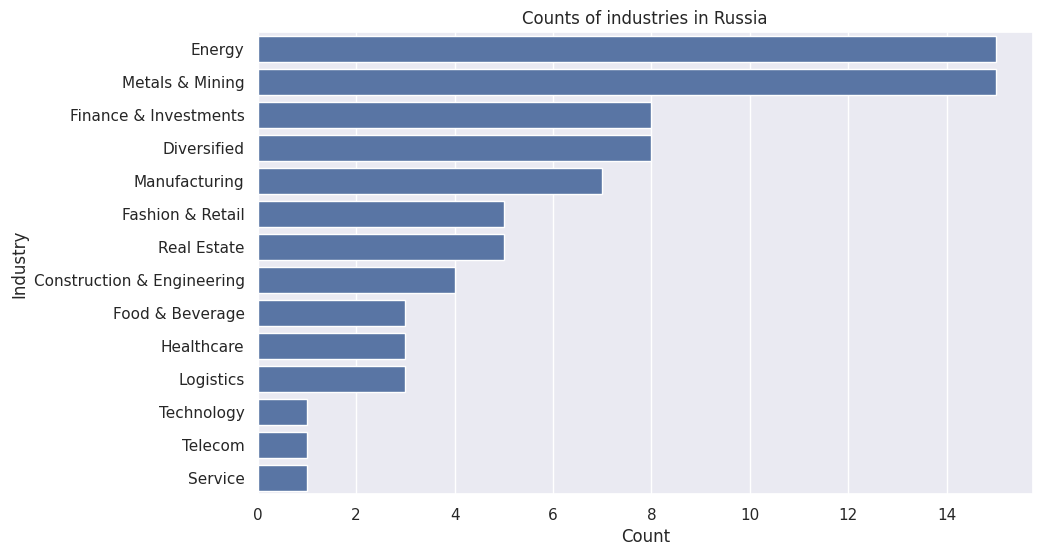

In [55]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=rus_business_category.values,
                 y=rus_business_category.index,
                 order=rus_business_category.index)

plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('Counts of industries in Russia')

plt.show()

В России больше всего миллиардеров преуспело в энергетике, добыче металлов, финансах и инвестициях

####Корреляции

Рассмотрим, какие могут быть корреляции между состоянием миллиардеров и экономическими показателями страны, где он проживает

In [40]:
corr_billies = billionaires[['finalWorth',
                             'cpi_country',
                             'cpi_change_country',
                             'gdp_country',
                             'tax_revenue_country_country',
                             'total_tax_rate_country']]
corr_billies.head(2)

,finalWorth,cpi_country,cpi_change_country,gdp_country,tax_revenue_country_country,total_tax_rate_country
0,211.0,110.05,1.1,2.715518e+12,24.2,60.7
1,180.0,117.24,7.5,2.142770e+13,9.6,36.6
2,114.0,117.24,7.5,2.142770e+13,9.6,36.6
3,107.0,117.24,7.5,2.142770e+13,9.6,36.6
4,106.0,117.24,7.5,2.142770e+13,9.6,36.6


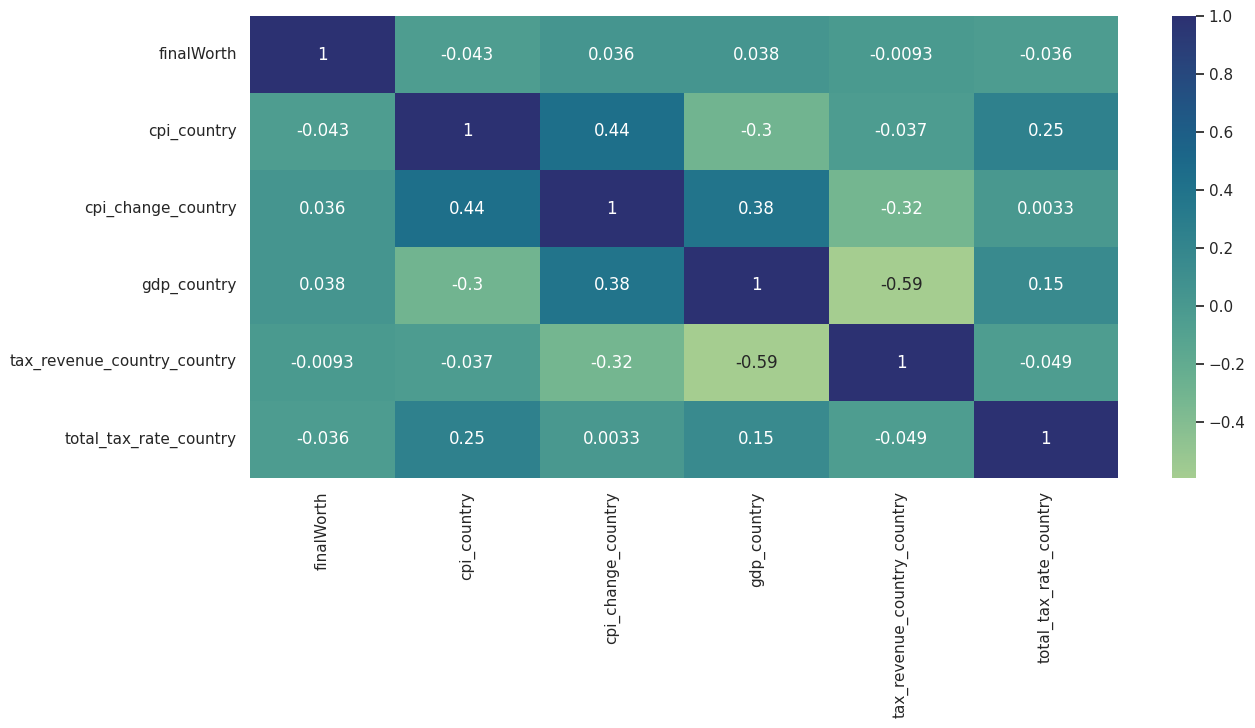

In [41]:
sns.heatmap(corr_billies.corr(), annot=True, cmap="crest");

Из таблицы выше можно сделать вывод, что состояние миллиардеров не связано с экономическими показателями страны, где он проживает, так как все коэффициенты корреляции $\approx 0$. Скорее оно связано с личными показателями человека.